# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jonkrohn/DLTFpT/blob/master/notebooks/shallow_net_in_tensorflow.ipynb)

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

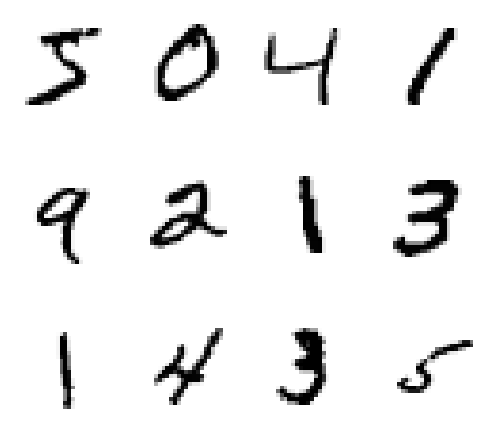

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
#Let's check the shape of the validation set as well, 
# there are 10_000 images each image of 28 * 28 pixel size.
X_valid.shape

(10000, 28, 28)

In [8]:
# validation set - just specify the number - not image so that is why second and third dimensions are empty
y_valid.shape

(10000,)

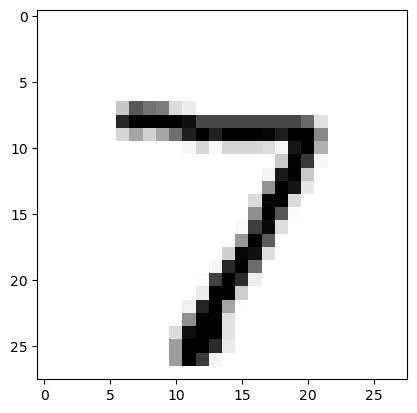

In [9]:
# input data, shown visually.
_ = plt.imshow(X_valid[0], cmap='Greys')

In [10]:
# input data, actually how it is stored
# you can notice majority of the values are zero - which represents white (background)
# few values are 255 - black (represents part of the number)
# ranges between 0 - 255 (represents part of the number)
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
# We are converting two dimensional image to single dimension, that is why 28 * 28 = 784
# reshaped to 784 1D array and 
# the note we are converting it to float type. You will know why it is done in next cell.
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
# Now after above cell execution, each pixel will have value of float type and ranges from 0.0 to 255.0
# Now we are dividing each pixel by 255
# after dividing each pixel value will range from 0.0 to 1.0
# Why we are doing this means
# we know ML and Deep learning model performs well if the data if of normal distribution format
# That is the reason, we scaled the values in 0 - 1 range, so mean and standard deviation will also be close to 1
# DL models, fit the data more accurately.
# Refer to maths classes of normal distribution for more details.
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
# here, we are converting the format of the output variable
# using one-hot encoding technique
# instead of actually storing some actual number in output eg: 1, 2, 3...9
# we actually have a single dimensional array of size 10
# say the output is 3 (actual not predicted) - we will set array[3] as 1.0
# This is a better way of representing output because,
# even in the neural network architecture of this problem, there were 10 output neurons
# so this aligns with that design.
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

#### Design neural network architecture

In [17]:
# just high level information of Sequential model is
# data flows in sequential way in Neural network
# means after one layer completes execution, the other layer will start execution using previous layer output.
model = Sequential()

# hidden Layer: 
# we are adding layers here, 
# if you observe the architecture of this problem in OneNote, 
# there is a hidden layer, with 64 neurons with sigmoid as the activation function. 
# for first hidden layer, we have to specify the input shape it 784,...
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

# output Layer:
# How we added hidden layer, similarly we have to add output layer
# This layer consist of 10 neurons, with softmax as the activation function.
model.add(Dense(10, activation='softmax'))

/Users/sshivagangeprakash/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# this method just summarises the model information we have created.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [22]:
# in compile phase,
# Any ML or DL algorithm, the process will be like
# first we initialize random values (hyper parameters) and
# try to predict output and we compare with the actual ones
# this difference is called as Cost or loss.
# we optimize our model parameters to reduce the cost. 
# Exactly same thing is done below. 

# loss - what kind of loss or cost function we are considering it is - mean Squared Error

#optimizer
# we have optimize model parameters, to reach global minima - in this case reduce cost - what strategy are we using
# for it - in this case SGD - Stocastic Gradient Descent with learning rate - 0.01 - steps in which model should move

#accuracy
# accuracy metrics.
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

#### Train!

In [23]:
# now we want to train our model, 
# First we want to pass our training input and training output 
# batch size - amount of input records to be processed in each iteration. 
# epochs - number of times the whole process should run - 200 means
# from input layer to output layer for each input records - the whole process will be repeated 200 times.
# verbose = 1, we get some visual outputs
# specifiy valiation data so it will compare the predicted model and show accuracy


model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - accuracy: 0.1100 - loss: 0.0939 - val_accuracy: 0.1224 - val_loss: 0.0929
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.1199 - loss: 0.0928 - val_accuracy: 0.1332 - val_loss: 0.0922
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.1384 - loss: 0.0922 - val_accuracy: 0.1625 - val_loss: 0.0917
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.1685 - loss: 0.0917 - val_accuracy: 0.1938 - val_loss: 0.0912
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.1971 - loss: 0.0913 - val_accuracy: 0.2201 - val_loss: 0.0908
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.2193 - loss: 0.0909 - val_accuracy: 0.2401 - val_loss: 0.0904
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.2426 - loss: 0.0904 - val_accuracy: 0.2562 - val_loss: 0.0901
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.2524 - loss: 0

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.4878 - loss: 0.0736 - val_accuracy: 0.5001 - val_loss: 0.0727
Epoch 51/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4962 - loss: 0.0730 - val_accuracy: 0.5049 - val_loss: 0.0723
Epoch 52/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.4956 - loss: 0.0726 - val_accuracy: 0.5089 - val_loss: 0.0718
Epoch 53/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.5015 - loss: 0.0722 - val_accuracy: 0.5127 - val_loss: 0.0713
Epoch 54/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.5070 - loss: 0.0716 - val_accuracy: 0.5162 - val_loss: 0.0709
Epoch 55/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.5102 - loss: 0.0711 - val_accuracy: 0.5194 - val_loss: 0.0704
Epoch 56/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5151 - loss: 0.0706 - val_accuracy: 0.5245 - val_loss: 0.0699
Epoch 57/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.5161 - loss: 0.0703

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7272 - loss: 0.0521 - val_accuracy: 0.7415 - val_loss: 0.0509
Epoch 100/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.7321 - loss: 0.0516 - val_accuracy: 0.7433 - val_loss: 0.0505
Epoch 101/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.7343 - loss: 0.0511 - val_accuracy: 0.7445 - val_loss: 0.0501
Epoch 102/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7371 - loss: 0.0507 - val_accuracy: 0.7472 - val_loss: 0.0497
Epoch 103/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.7391 - loss: 0.0504 - val_accuracy: 0.7490 - val_loss: 0.0493
Epoch 104/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.7355 - loss: 0.0502 - val_accuracy: 0.7508 - val_loss: 0.0490
Epoch 105/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.7388 - loss: 0.0497 - val_accuracy: 0.7529 - val_loss: 0.0486
Epoch 106/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7400 - loss:

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.8083 - loss: 0.0374 - val_accuracy: 0.8217 - val_loss: 0.0363
Epoch 149/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8087 - loss: 0.0372 - val_accuracy: 0.8226 - val_loss: 0.0360
Epoch 150/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8119 - loss: 0.0369 - val_accuracy: 0.8245 - val_loss: 0.0358
Epoch 151/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8143 - loss: 0.0369 - val_accuracy: 0.8251 - val_loss: 0.0356
Epoch 152/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.8125 - loss: 0.0366 - val_accuracy: 0.8260 - val_loss: 0.0354
Epoch 153/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.8144 - loss: 0.0363 - val_accuracy: 0.8274 - val_loss: 0.0352
Epoch 154/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.8170 - loss: 0.0362 - val_accuracy: 0.8280 - val_loss: 0.0350
Epoch 155/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.8187 - loss:

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8528 - loss: 0.0292 - val_accuracy: 0.8594 - val_loss: 0.0282
Epoch 198/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8536 - loss: 0.0290 - val_accuracy: 0.8602 - val_loss: 0.0281
Epoch 199/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.8532 - loss: 0.0290 - val_accuracy: 0.8609 - val_loss: 0.0280
Epoch 200/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8533 - loss: 0.0288 - val_accuracy: 0.8614 - val_loss: 0.0279


#### Evaluating model performance

In [24]:
# outputs loss and accuracy of the model.
model.evaluate(X_valid, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8417 - loss: 0.0306


[0.027851050719618797, 0.8614000082015991]

#### Performing inference

In [25]:
# this step is optional, but for our satisfaction and understanding we are doing it
# go above and check, first input image is number 7
# we are converting the validation set image7 to 1D array.
valid_0 = X_valid[0].reshape(1, 784)

In [26]:
# we are trying to predict the output for the above test data
# output is an array, if you observe array[7] has highest value, 
# means model is predicting that number could be 7
model.predict(valid_0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[4.8121847e-03, 7.6901860e-04, 4.2336322e-03, 7.4341968e-03,
        1.0613347e-02, 6.3495552e-03, 8.7288237e-04, 9.2927068e-01,
        3.4985240e-03, 3.2146018e-02]], dtype=float32)

In [27]:
# instead of above cell, same prediction can be done using predict_classes() or predict.
# model.predict_classes(valid_0)

In [28]:
# The predict_classes() method no longer exists in recent TensorFlow releases. 
# Instead you could use:
import numpy as np
np.argmax(model.predict(valid_0), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([7])